In [1]:
import math

import numpy as np
import pandas as pd
import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt

import warnings

In [2]:
df_daily = pd.read_csv('dataset/salesdaily.csv', parse_dates=['datum'])
df_daily.set_index('datum', inplace=True)
df_daily.index.rename('DateTime', inplace=True)
df_daily.head()

M01AB  M01AE  N02BA  N02BE  N05B  N05C   R03  R06  Year  Month  \
DateTime                                                                     
2014-01-02    0.0   3.67    3.4  32.40   7.0   0.0   0.0  2.0  2014      1   
2014-01-03    8.0   4.00    4.4  50.60  16.0   0.0  20.0  4.0  2014      1   
2014-01-04    2.0   1.00    6.5  61.85  10.0   0.0   9.0  1.0  2014      1   
2014-01-05    4.0   3.00    7.0  41.10   8.0   0.0   3.0  0.0  2014      1   
2014-01-06    5.0   1.00    4.5  21.70  16.0   2.0   6.0  2.0  2014      1   

            Hour Weekday Name  
DateTime                       
2014-01-02   248     Thursday  
2014-01-03   276       Friday  
2014-01-04   276     Saturday  
2014-01-05   276       Sunday  
2014-01-06   276       Monday

In [3]:
df_weekly = pd.read_csv('dataset/salesweekly.csv')
df_weekly.set_index('datum', inplace=True)
df_weekly.index.rename('DateTime', inplace=True)
df_weekly.head()

M01AB  M01AE  N02BA   N02BE  N05B  N05C   R03   R06
DateTime                                                      
1/5/2014   14.00  11.67   21.3  185.95  41.0   0.0  32.0   7.0
1/12/2014  29.33  12.68   37.9  190.70  88.0   5.0  21.0   7.2
1/19/2014  30.67  26.34   45.9  218.40  80.0   8.0  29.0  12.0
1/26/2014  34.00  32.37   31.5  179.60  80.0   8.0  23.0  10.0
2/2/2014   31.02  23.35   20.7  159.88  84.0  12.0  29.0  12.0

In [4]:
df_monthly = pd.read_csv('dataset/salesmonthly.csv', parse_dates=['datum'])
df_monthly['Year'] = df_monthly['datum'].dt.year
df_monthly.set_index('datum', inplace=True)
df_monthly.index.rename('DateTime', inplace=True)
df_monthly.head()

M01AB    M01AE    N02BA     N02BE   N05B  N05C    R03    R06  \
DateTime                                                                    
2014-01-31  127.69   99.090  152.100   878.030  354.0  50.0  112.0   48.2   
2014-02-28  133.32  126.050  177.000  1001.900  347.0  31.0  122.0   36.2   
2014-03-31  137.44   92.950  147.655   779.275  232.0  20.0  112.0   85.4   
2014-04-30  113.10   89.475  130.900   698.500  209.0  18.0   97.0   73.7   
2014-05-31  101.79  119.933  132.100   628.780  270.0  23.0  107.0  123.7   

            Year  
DateTime          
2014-01-31  2014  
2014-02-28  2014  
2014-03-31  2014  
2014-04-30  2014  
2014-05-31  2014

In [5]:
df_hourly = pd.read_csv('dataset/saleshourly.csv', parse_dates=['datum'])
df_hourly['Day'] = df_hourly['datum'].dt.day
df_hourly.head()

datum  M01AB  M01AE  N02BA  N02BE  N05B  N05C  R03  R06  Year  \
0 2014-01-02 08:00:00    0.0   0.67    0.4    2.0   0.0   0.0  0.0  1.0  2014   
1 2014-01-02 09:00:00    0.0   0.00    1.0    0.0   2.0   0.0  0.0  0.0  2014   
2 2014-01-02 10:00:00    0.0   0.00    0.0    3.0   2.0   0.0  0.0  0.0  2014   
3 2014-01-02 11:00:00    0.0   0.00    0.0    2.0   1.0   0.0  0.0  0.0  2014   
4 2014-01-02 12:00:00    0.0   2.00    0.0    5.0   2.0   0.0  0.0  0.0  2014   

   Month  Hour Weekday Name  Day  
0      1     8     Thursday    2  
1      1     9     Thursday    2  
2      1    10     Thursday    2  
3      1    11     Thursday    2  
4      1    12     Thursday    2

In [6]:
print('Hourly data: ', df_hourly.shape)
print('Daily data: ', df_daily.shape)
print('Weekly data: ', df_weekly.shape)
print('Monthly data: ', df_monthly.shape)

Hourly data:  (50532, 14)
Daily data:  (2106, 12)
Weekly data:  (302, 8)
Monthly data:  (70, 9)


In [7]:
df_hourly.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50532 entries, 0 to 50531
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   datum         50532 non-null  datetime64[ns]
 1   M01AB         50532 non-null  float64       
 2   M01AE         50532 non-null  float64       
 3   N02BA         50532 non-null  float64       
 4   N02BE         50532 non-null  float64       
 5   N05B          50532 non-null  float64       
 6   N05C          50532 non-null  float64       
 7   R03           50532 non-null  float64       
 8   R06           50532 non-null  float64       
 9   Year          50532 non-null  int64         
 10  Month         50532 non-null  int64         
 11  Hour          50532 non-null  int64         
 12  Weekday Name  50532 non-null  object        
 13  Day           50532 non-null  int32         
dtypes: datetime64[ns](1), float64(8), int32(1), int64(3), object(1)
memory usage: 5.2+ MB


In [8]:
df_hourly.isna().sum()

datum           0
M01AB           0
M01AE           0
N02BA           0
N02BE           0
N05B            0
N05C            0
R03             0
R06             0
Year            0
Month           0
Hour            0
Weekday Name    0
Day             0
dtype: int64

In [9]:
df_hourly = df_hourly.set_index('datum')
df_hourly.index.rename('DateTime', inplace=True)


In [10]:
df_hourly.head()

M01AB  M01AE  N02BA  N02BE  N05B  N05C  R03  R06  Year  \
DateTime                                                                      
2014-01-02 08:00:00    0.0   0.67    0.4    2.0   0.0   0.0  0.0  1.0  2014   
2014-01-02 09:00:00    0.0   0.00    1.0    0.0   2.0   0.0  0.0  0.0  2014   
2014-01-02 10:00:00    0.0   0.00    0.0    3.0   2.0   0.0  0.0  0.0  2014   
2014-01-02 11:00:00    0.0   0.00    0.0    2.0   1.0   0.0  0.0  0.0  2014   
2014-01-02 12:00:00    0.0   2.00    0.0    5.0   2.0   0.0  0.0  0.0  2014   

                     Month  Hour Weekday Name  Day  
DateTime                                            
2014-01-02 08:00:00      1     8     Thursday    2  
2014-01-02 09:00:00      1     9     Thursday    2  
2014-01-02 10:00:00      1    10     Thursday    2  
2014-01-02 11:00:00      1    11     Thursday    2  
2014-01-02 12:00:00      1    12     Thursday    2

In [11]:
df_hourly.index.inferred_freq

'H'

## Exploratory Data Analysis

In [12]:
df = df_hourly.copy()

In [13]:
df.drop(columns=['Year', 'Month', 'Hour', 'Weekday Name', 'Day'], inplace=True)

<Axes: xlabel='DateTime'>

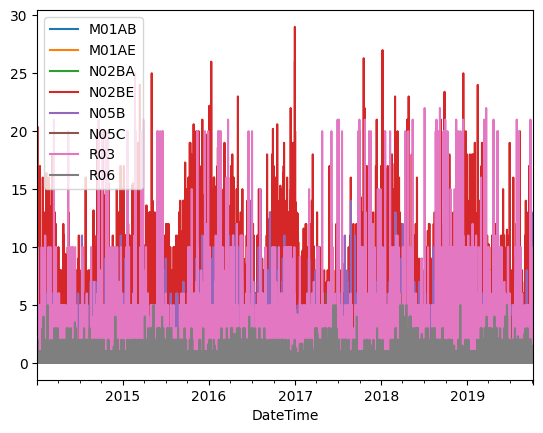

In [14]:
df_hourly[['M01AB', 'M01AE', 'N02BA', 'N02BE', 'N05B', 'N05C', 'R03', 'R06']].plot()

<Axes: xlabel='DateTime'>

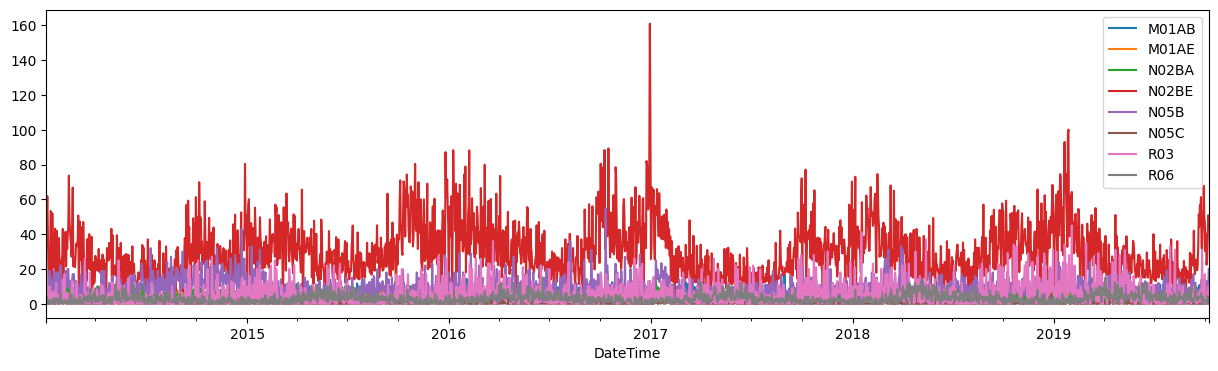

In [15]:
df_daily[['M01AB', 'M01AE', 'N02BA', 'N02BE', 'N05B', 'N05C', 'R03', 'R06']].plot(figsize=(15, 4))

### Daily Sales

In [16]:
df.columns

Index(['M01AB', 'M01AE', 'N02BA', 'N02BE', 'N05B', 'N05C', 'R03', 'R06'], dtype='object')

In [17]:
drugs = ['M01AB', 'M01AE', 'N02BA', 'N02BE', 'N05B', 'N05C', 'R03', 'R06']

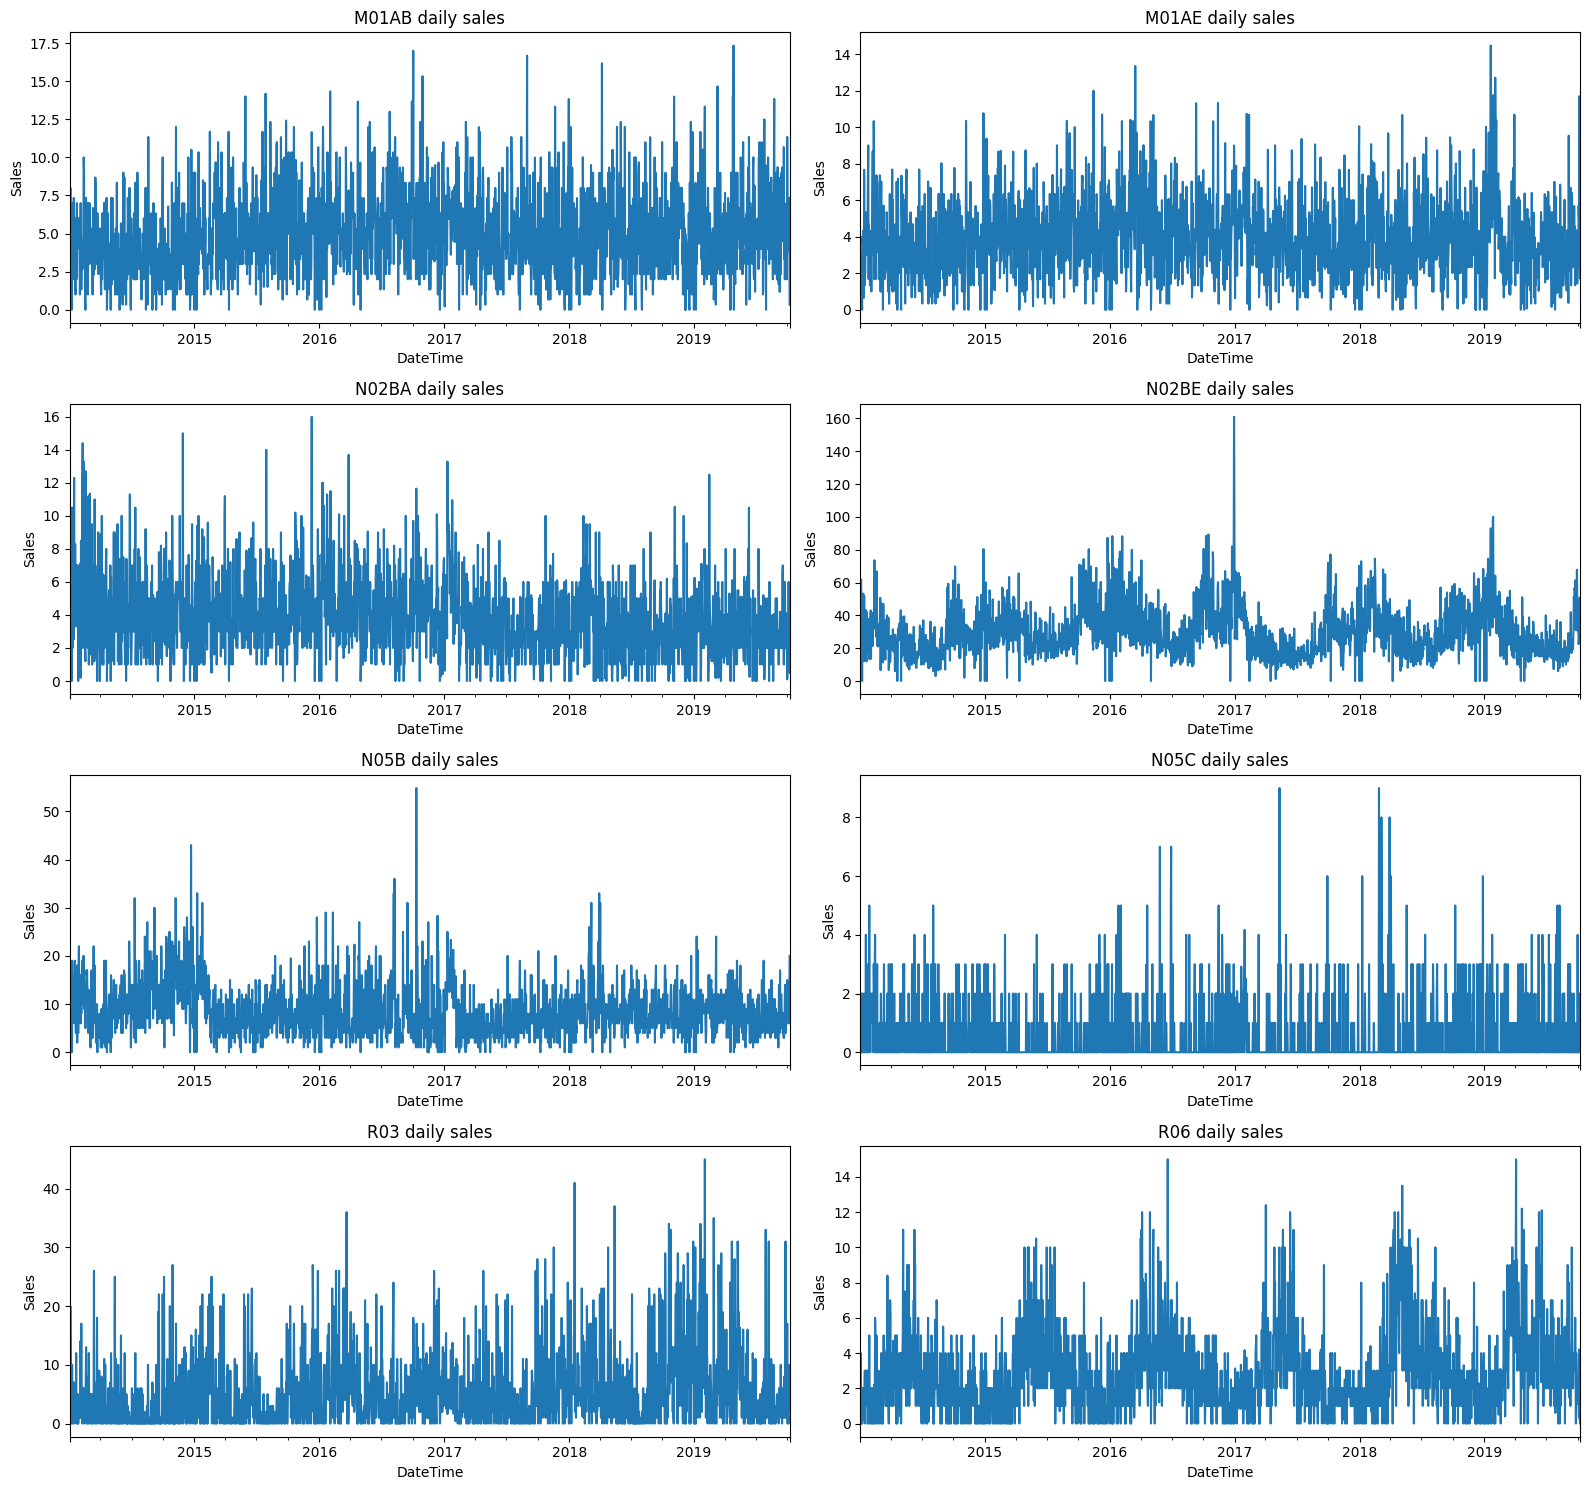

In [77]:
fig, axes = plt.subplots(4, 2, figsize=(16,15))

# Flatten the axes array
axes = axes.ravel()
for i, drug in enumerate(drugs):
    ax = axes[i]
    df_daily[drug].plot(ax=ax, title=f'{drug} daily sales')
    ax.set_ylabel('Sales')

plt.tight_layout()
plt.show()


#### If we closely observe the above line plots, we can see that there is some sort of seasonality in the sales of drugs **R06**, **R03**, and **NO2BE**.

### Weekly Sales

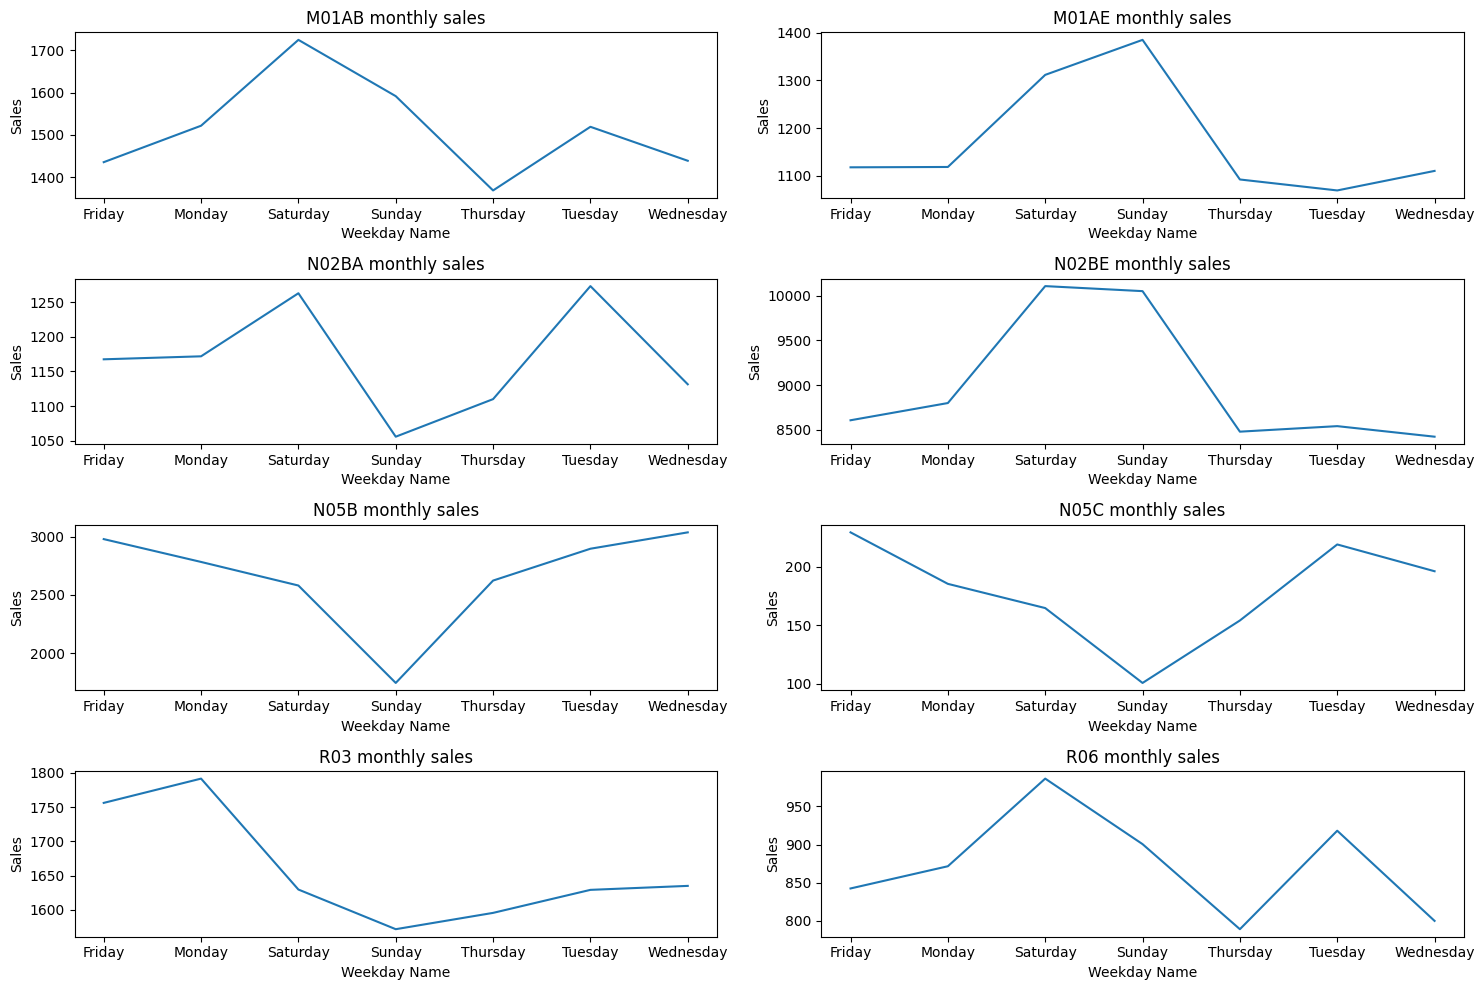

In [19]:
fig, axes = plt.subplots(4, 2, figsize=(15,10))

# Flatten the axes array
axes = axes.ravel()
for i, drug in enumerate(drugs):
    ax = axes[i]
    df_daily.groupby('Weekday Name')[drug].sum().plot(ax=ax, title=f'{drug} monthly sales')
    ax.set_ylabel('Sales')

plt.tight_layout()
plt.show()


In [20]:
# Reshape the data to have a Column 'Category' of drugs and it's 'Sales'
melted_df = pd.melt(df_daily, id_vars=['Weekday Name'], value_vars=['M01AB', 'M01AE', 'N02BA', 'N02BE', 'N05B', 'N05C', 'R03', 'R06'],
                    var_name='Category', value_name='Sales')

# Group the data by Category and Month and calculate the total consumption
grouped_df = melted_df.groupby(['Category', 'Weekday Name']).sum().reset_index()

fig = px.bar(grouped_df, x='Weekday Name', y='Sales', color='Category', barmode='group', height=500)

# Customize the layout
fig.update_layout(
    title = 'Total weekly sales of each drug',
    xaxis_title = 'Weekdays',
    yaxis_title = 'Sales',
    legend_title = 'Drugs'
)
fig.show()

### Monthly Sales

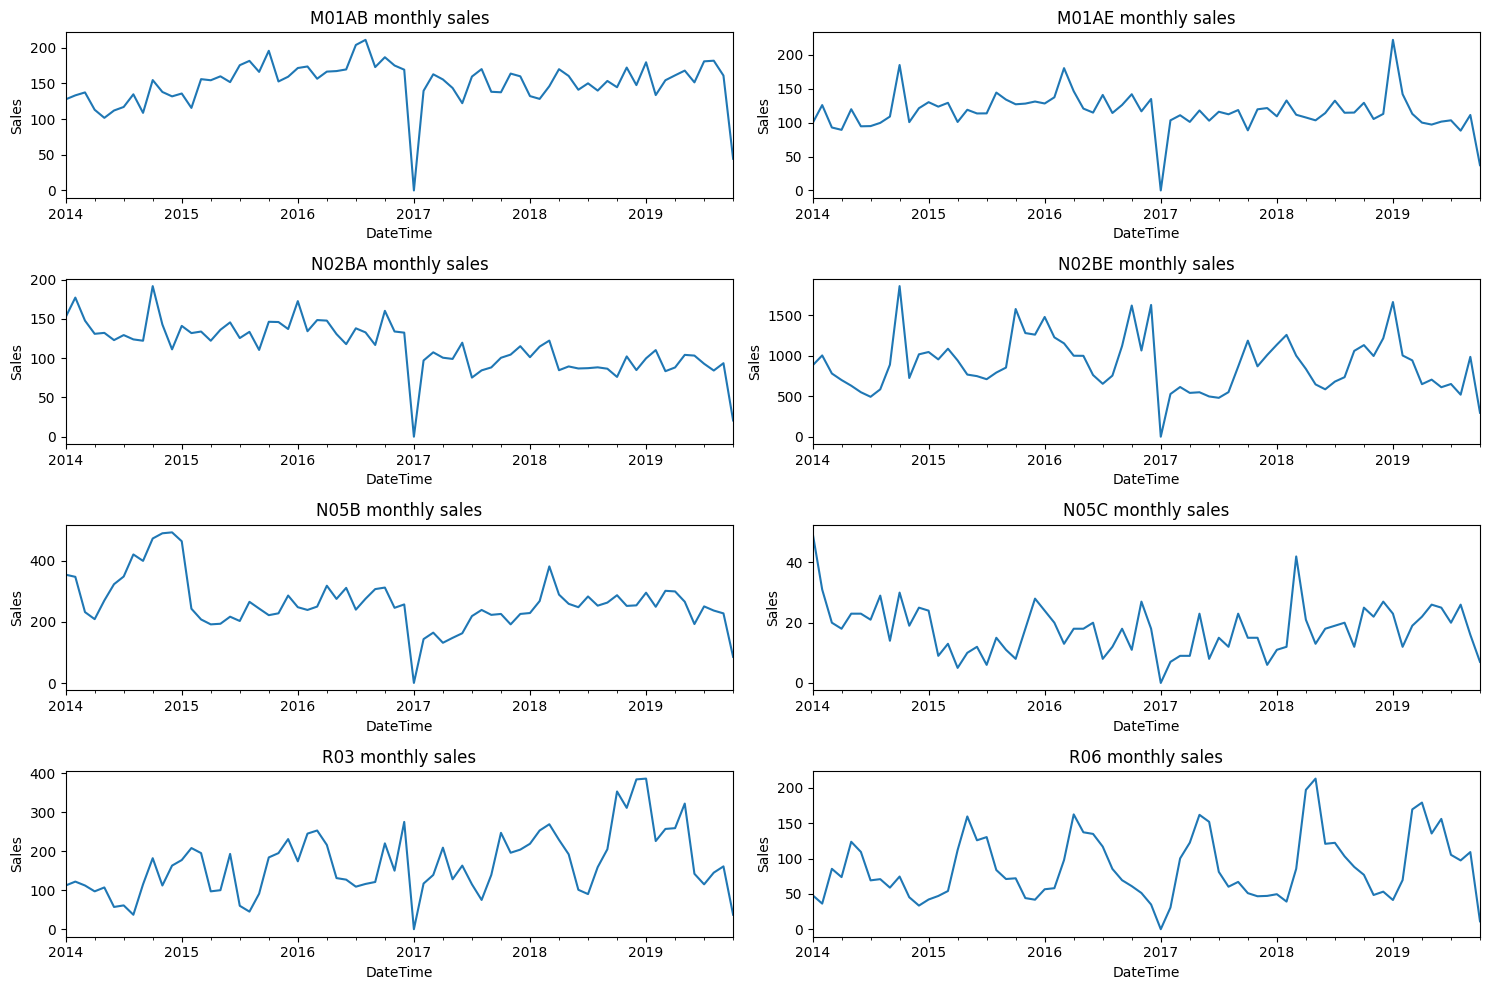

In [21]:
fig, axes = plt.subplots(4, 2, figsize=(15,10))

# Flatten the axes array
axes = axes.ravel()
for i, drug in enumerate(drugs):
    ax = axes[i]
    df_monthly[drug].plot(ax=ax, title=f'{drug} monthly sales')
    ax.set_ylabel('Sales')

plt.tight_layout()
plt.show()


In [22]:
# Reshape the data to have a Column 'Category' of drugs and it's 'Sales'
melted_df = pd.melt(df_daily, id_vars=['Year', 'Month'], value_vars=['M01AB', 'M01AE', 'N02BA', 'N02BE', 'N05B', 'N05C', 'R03', 'R06'],
                    var_name='Category', value_name='Sales')

# Group the data by Category and Month and calculate the total consumption
grouped_df = melted_df.groupby(['Category', 'Month']).sum().reset_index()

fig = px.bar(grouped_df, x='Month', y='Sales', color='Category', barmode='group', height=500)

# Customize the layout
fig.update_layout(
    title = 'Total monthly sales of each drug',
    xaxis_title = 'Month',
    yaxis_title = 'Sales',
    legend_title = 'Drugs'
)
fig.show()

### Yearly Sales

In [23]:
df_monthly.head()

M01AB    M01AE    N02BA     N02BE   N05B  N05C    R03    R06  \
DateTime                                                                    
2014-01-31  127.69   99.090  152.100   878.030  354.0  50.0  112.0   48.2   
2014-02-28  133.32  126.050  177.000  1001.900  347.0  31.0  122.0   36.2   
2014-03-31  137.44   92.950  147.655   779.275  232.0  20.0  112.0   85.4   
2014-04-30  113.10   89.475  130.900   698.500  209.0  18.0   97.0   73.7   
2014-05-31  101.79  119.933  132.100   628.780  270.0  23.0  107.0  123.7   

            Year  
DateTime          
2014-01-31  2014  
2014-02-28  2014  
2014-03-31  2014  
2014-04-30  2014  
2014-05-31  2014

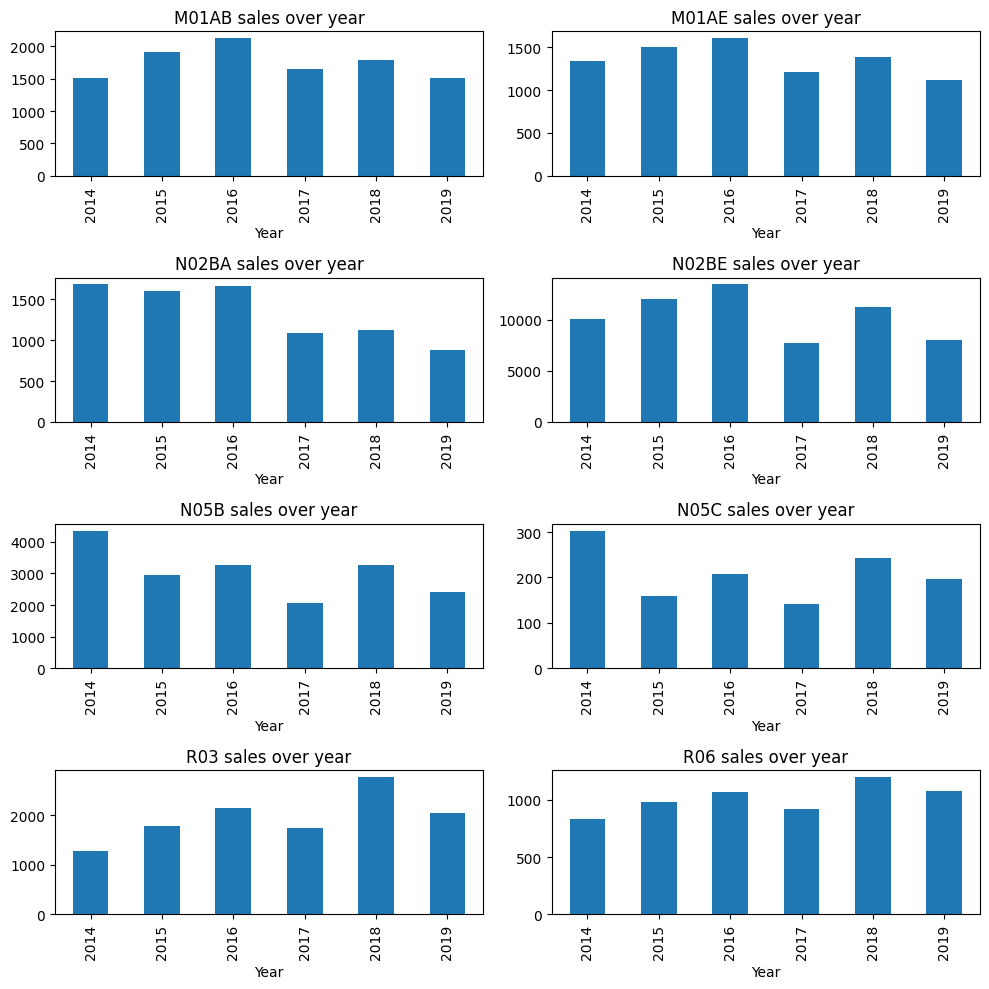

In [24]:
fig, axes = plt.subplots(4, 2, figsize=(10,10))

# Flatten the axes array
axes = axes.ravel()
for i, drug in enumerate(drugs):
    ax = axes[i]
    df_monthly.groupby('Year')[drug].sum().plot(kind='bar', ax=ax, title=f'{drug} sales over year')

plt.tight_layout()
plt.show()


In [25]:
grouped_df

Category  Month    Year       Sales
0     M01AB      1  373055  929.132083
1     M01AB      2  340788  844.920000
2     M01AB      3  375069  913.650000
3     M01AB      4  362970  921.230000
4     M01AB      5  375069  901.390000
..      ...    ...     ...         ...
91      R06      8  375069  500.300000
92      R06      9  362970  463.200000
93      R06     10  328632  318.617500
94      R06     11  302400  235.400000
95      R06     12  312480  210.230000

[96 rows x 4 columns]

In [26]:
df_daily.groupby('Month')[drug].sum()

Month
1     299.2500
2     287.8600
3     592.3400
4     846.7000
5     930.5500
6     798.6400
7     624.7300
8     500.3000
9     463.2000
10    318.6175
11    235.4000
12    210.2300
Name: R06, dtype: float64

In [27]:
for drug in drugs:
    px.bar(df_daily.groupby('Month')[drug].sum())

## Time-series Decomposition [Daily sales data]

### Origial series of daily sales

In [28]:
from statsmodels.tsa.seasonal import seasonal_decompose

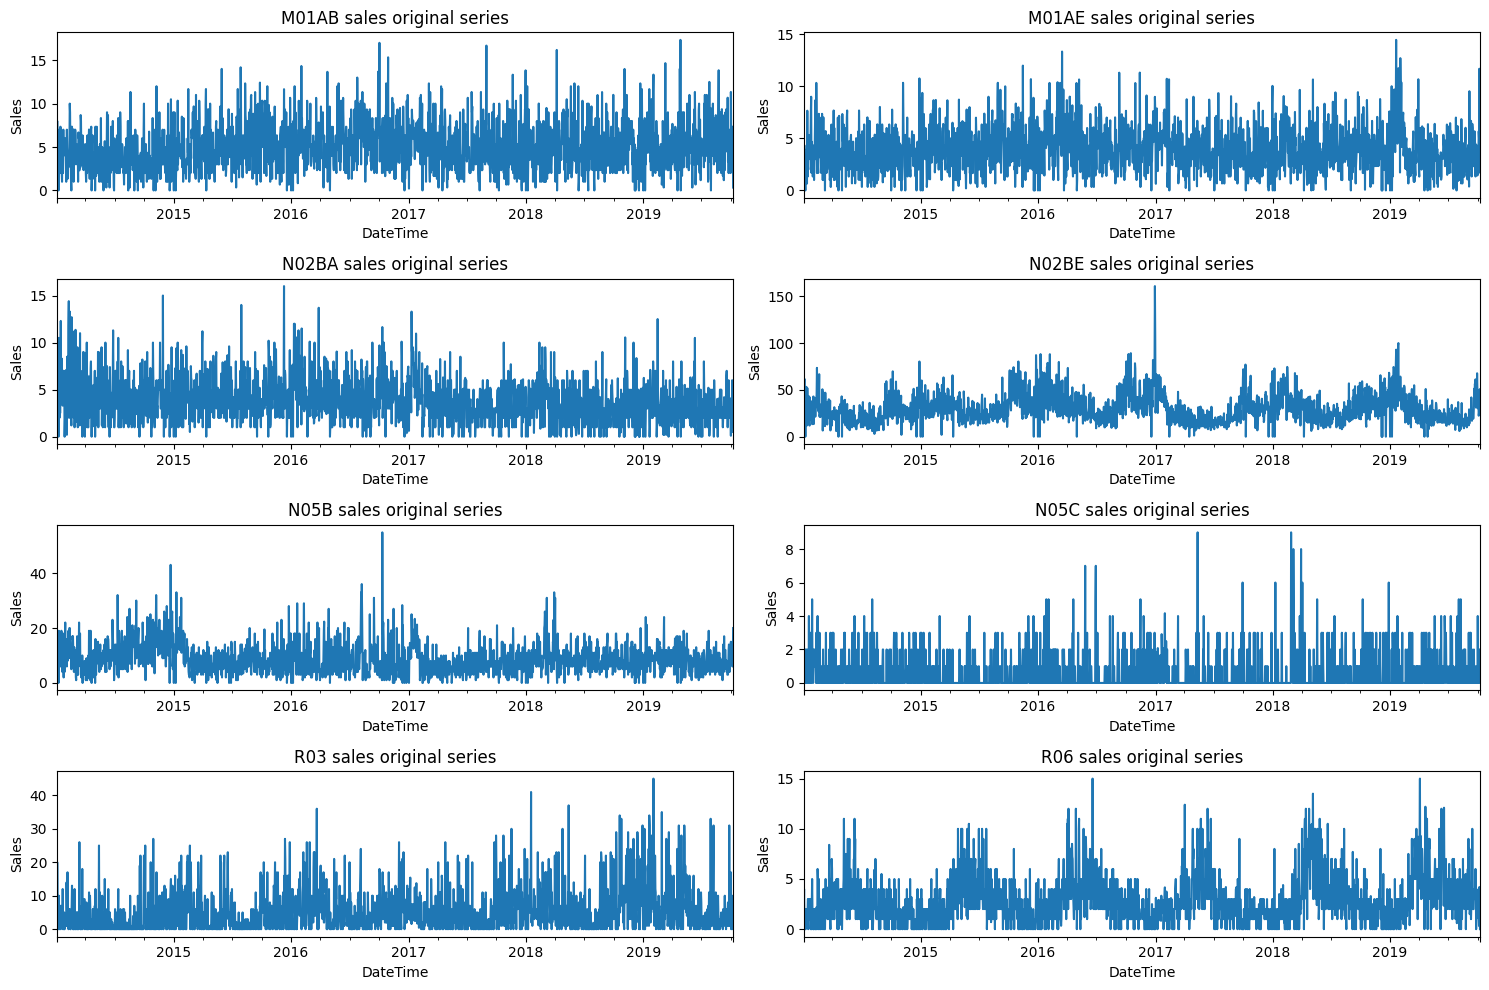

In [29]:
fig, axes = plt.subplots(4, 2, figsize=(15,10))

# Flatten the axes array
axes = axes.ravel()
for i, drug in enumerate(drugs):
    ax = axes[i]
    df_daily[drug].plot(ax=ax, title=f'{drug} daily sales')
    ax.set_ylabel('Sales')
    ax.set_title(f'{drug} sales original series')

plt.tight_layout()
plt.show()


### Trend in the daily sales of all drugs

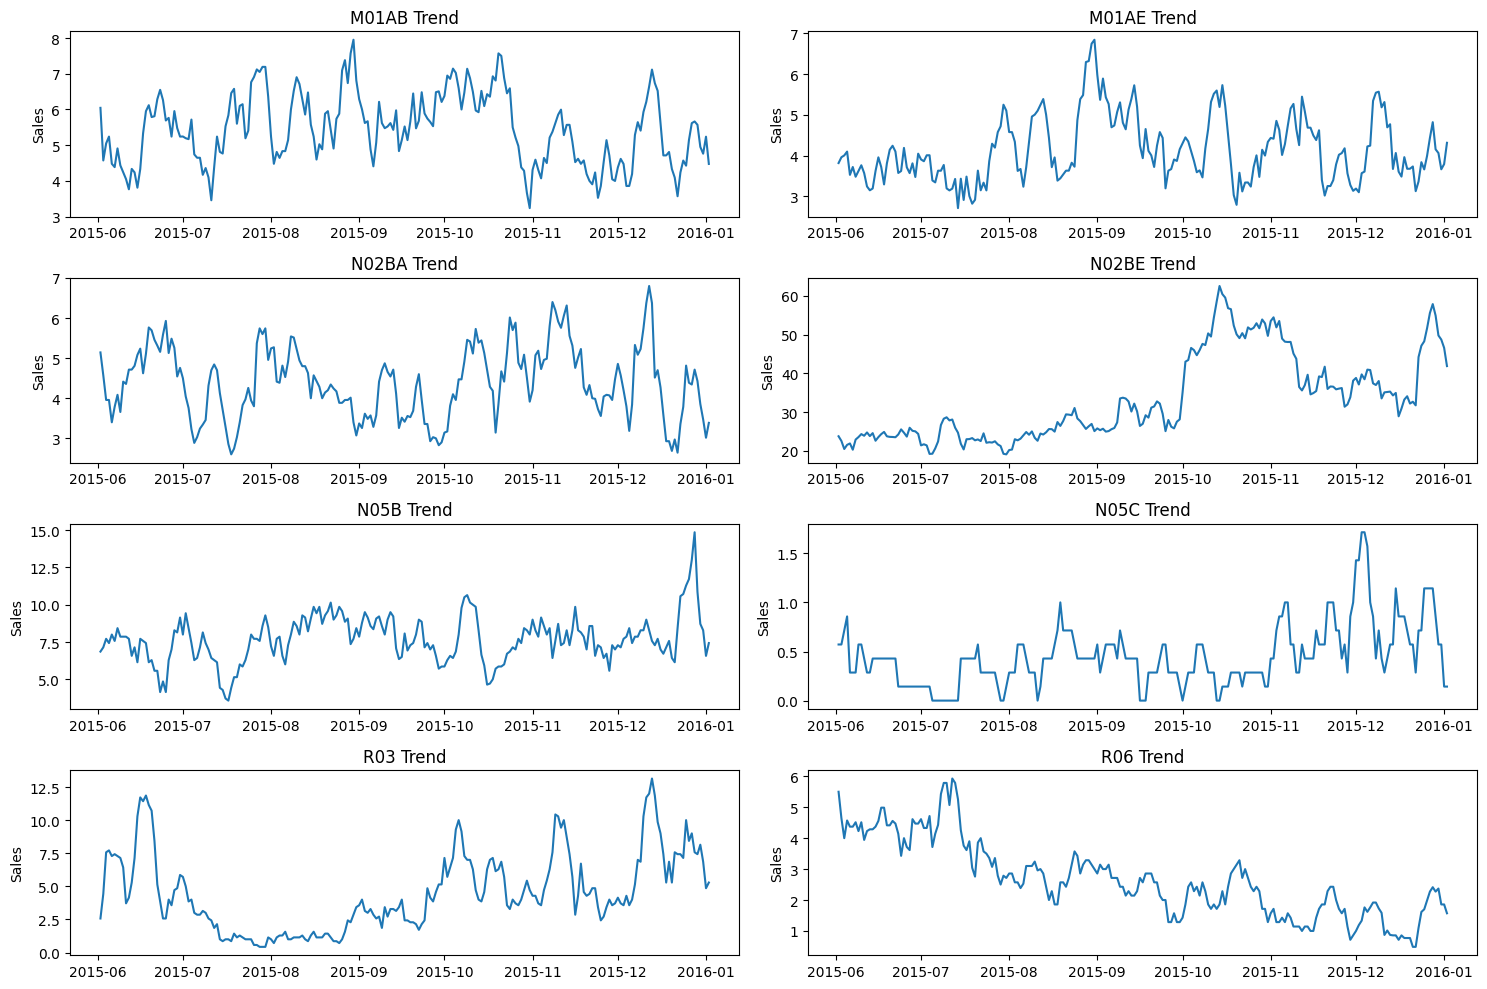

In [30]:
fig, axes = plt.subplots(4, 2, figsize=(15,10))

# Flatten the axes array
axes = axes.ravel()
for i, drug in enumerate(drugs):
    ax = axes[i]
    #since the magnitude of seasonal values in our dataset is independent of trend we'll use additive decomposition
    decomposition_result = seasonal_decompose(x=df_daily[drug], model='additive')
    ax.plot(decomposition_result.trend['2015-06-02': '2016-01-02'])
    ax.set_ylabel('Sales')
    ax.set_title(f'{drug} Trend')

plt.tight_layout()
plt.show()


### Seasonality in the sales of all drugs

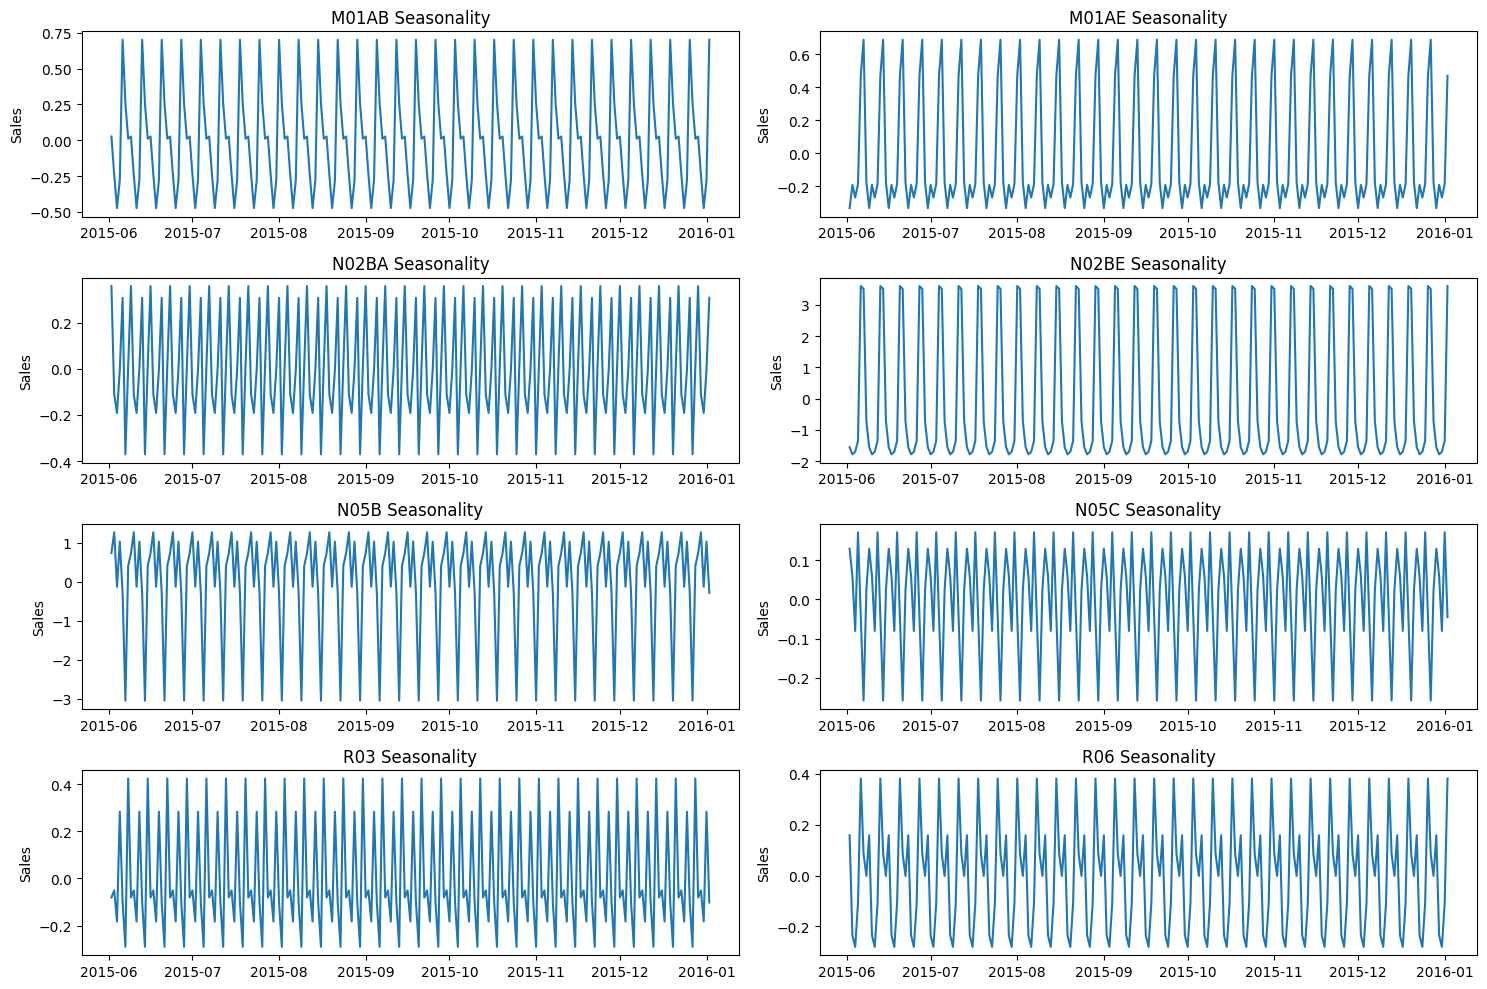

In [31]:
fig, axes = plt.subplots(4, 2, figsize=(15,10))

# Flatten the axes array
axes = axes.ravel()
for i, drug in enumerate(drugs):
    ax = axes[i]
    #since the magnitude of seasonal values in our dataset is independent of trend we'll use additive decomposition
    decomposition_result = seasonal_decompose(x=df_daily[drug], model='additive')
    ax.plot(decomposition_result.seasonal['2015-06-02': '2016-01-02'])
    ax.set_ylabel('Sales')
    ax.set_title(f'{drug} Seasonality')

plt.tight_layout()
plt.show()


### Residual

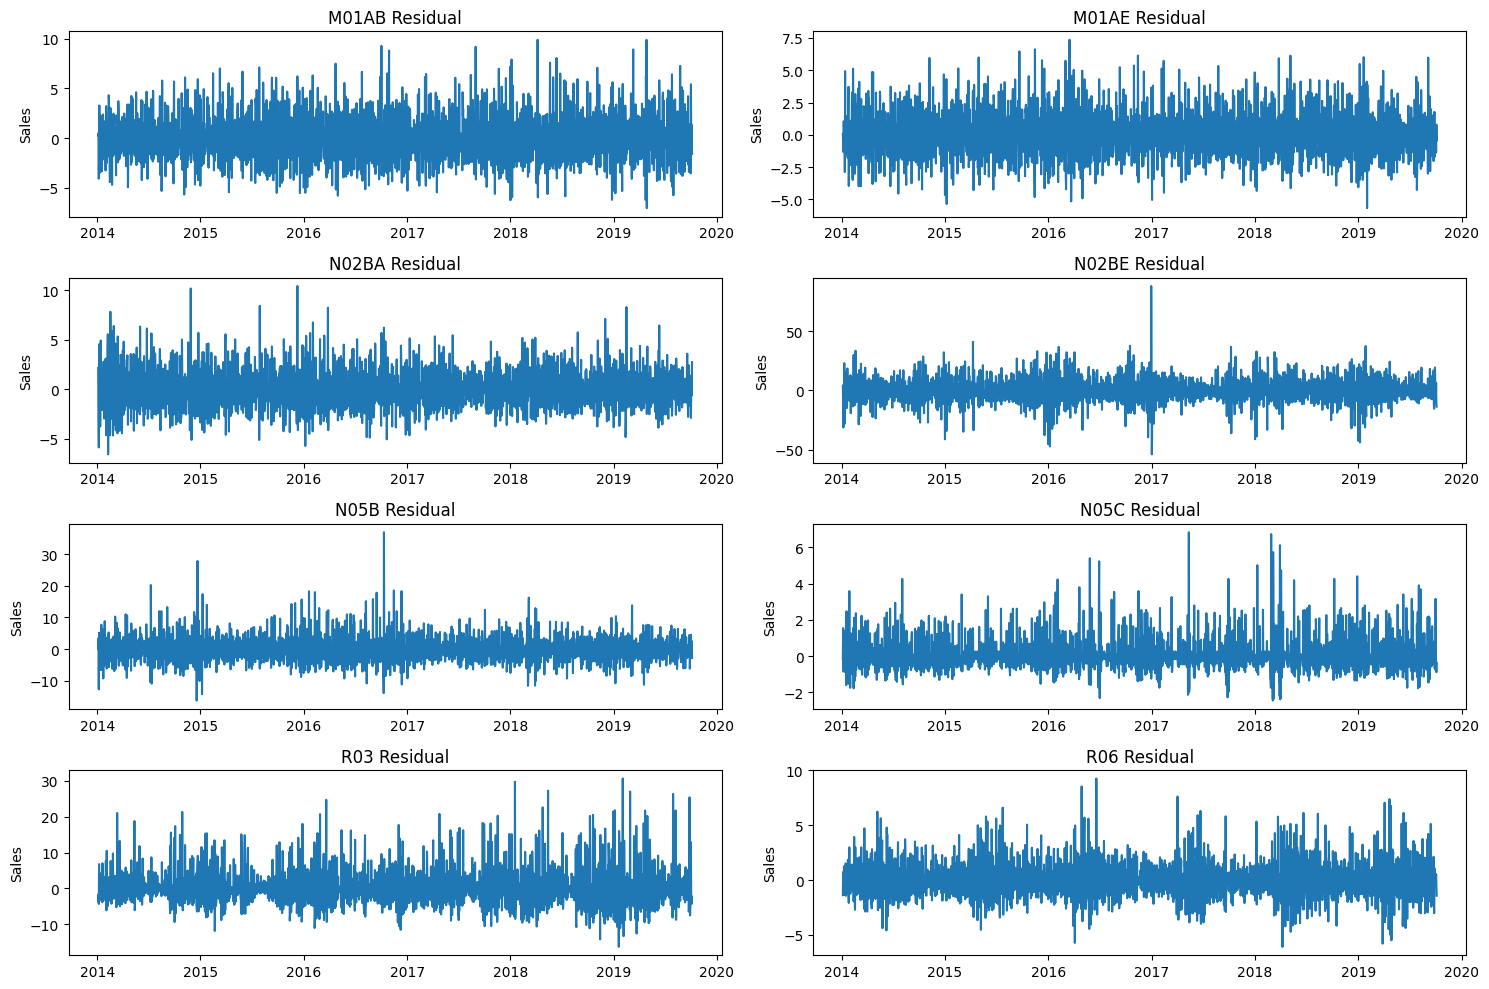

In [32]:
fig, axes = plt.subplots(4, 2, figsize=(15,10))

# Flatten the axes array
axes = axes.ravel()
for i, drug in enumerate(drugs):
    ax = axes[i]
    #since the magnitude of seasonal values in our dataset is independent of trend we'll use additive decomposition
    decomposition_result = seasonal_decompose(x=df_daily[drug], model='additive')
    ax.plot(decomposition_result.resid)
    ax.set_ylabel('Sales')
    ax.set_title(f'{drug} Residual')

plt.tight_layout()
plt.show()


## Stationarity check

#### Augmented Dickey-Fuller (ADF) Test

adfuller() returns adf_stat, pvalue, usedlag, nobs, critical_values, icbest<br>
**Null Hypothesis**: Series is not stationary.<br>
**Alternative Hypothesis**: Series is stationary.

    If p-value < threshold, reject null hyppothesis.
    If p-value ≥ threshold, accept null hypothesis.
    If adf_stat < critical_val, reject null hypothesis.



#### Kwiatkowski-Phillips-Schmidt-Shin (KPSS) Test

ADF and KPSS has just opposite assumption. A key difference between them is in their assumption of null hypothesis

kpss() returns kpss_stat, p_value, lags, crit<br>
**Null Hypothesis**: Series is stationary.<br>
**Alternative Hypothesis**: Series is not stationary.

    If p-value < threshold, reject null hyppothesis.
    If p-value ≥ threshold, accept null hypothesis.
    If kpss_stat > critical_val, reject null hypothesis.

Generally, we take 0.05 as a threshold value.




In [33]:
from statsmodels.tsa.stattools import adfuller, kpss

In [34]:

def adf_test(timeseries):
    test_stat = adfuller(timeseries)
    result = pd.Series({'ADF statistic': test_stat[0],
                       'p-value': test_stat[1],
                        'Used lags': test_stat[2],
                        'Observations used': test_stat[3]})
    for key, value in test_stat[4].items():
        result['Critical value ({})'.format(key)] = value
    # if test_stat[1] < 0.05:
    #     print("Reject null hypothesis! Indicates that the data is stationary.")
    # else:
    #     print("Accept null hypothesis! Indicates that the data is not stationary.")
    return result

In [47]:
adfuller(df['M01AB'])

(-27.314636426707676,
 0.0,
 57,
 50474,
 {'1%': -3.430479564381631,
  '5%': -2.8615972648076338,
  '10%': -2.566800480161121},
 80374.60503482097)

#### Daily sales

In [38]:
for drug in ['M01AB','M01AE','N02BA','N02BE', 'N05B','N05C','R03','R06']:
    dftest = adfuller(df_daily[drug], regression='ct', autolag='AIC')
    print('\033[1mADF test for '+drug+'\033[0m')
    print("-----------------------------")
    print("Test statistic = {:.3f}".format(dftest[0]))
    print("P-value = {:.3f}".format(dftest[1]))
    print("Critical values :")
    for confidence, critical_val in dftest[4].items():
        print("\t{}: {} - The data is {} stationary with {}% confidence".format(confidence, critical_val, "not" if dftest[0]>critical_val else "", 100-int(confidence[:-1])))


ADF test for M01AB
-----------------------------
Test statistic = -8.669
P-value = 0.000
Critical values :
	1%: -3.9631060717799924 - The data is  stationary with 99% confidence
	5%: -3.41259173685078 - The data is  stationary with 95% confidence
	10%: -3.1282874376905356 - The data is  stationary with 90% confidence
ADF test for M01AE
-----------------------------
Test statistic = -7.471
P-value = 0.000
Critical values :
	1%: -3.9631206583322434 - The data is  stationary with 99% confidence
	5%: -3.4125988034261017 - The data is  stationary with 95% confidence
	10%: -3.128291597193074 - The data is  stationary with 90% confidence
ADF test for N02BA
-----------------------------
Test statistic = -7.829
P-value = 0.000
Critical values :
	1%: -3.9631123111656277 - The data is  stationary with 99% confidence
	5%: -3.412594759575526 - The data is  stationary with 95% confidence
	10%: -3.1282892169169547 - The data is  stationary with 90% confidence
ADF test for N02BE
----------------------

In [36]:
def kpss_test(timeseries):
    test_stat = kpss(timeseries)
    result = pd.Series({'KPSS statistic': test_stat[0],
                       'p-value': test_stat[1],
                        'Used lags': test_stat[2]})
    for key, value in test_stat[3].items():
        result['Critical value ({})'.format(key)] = value
    if test_stat[1] < 0.05:
        print("\nReject null hypothesis! Indicates that the data is not stationary.")
    else:
        print("\nAccept null hypothesis! Indicates that the data is stationary.")
    return result

In [37]:
warnings.filterwarnings("ignore")
for drug in drugs:
    print('\033[1mKPSS test for '+drug+'\033[0m')
    dftest = kpss(df_daily[drug], 'ct')
    print("Test statistic = {:.3f}".format(dftest[0]))
    print("P-value = {:.3f}".format(dftest[1]))
    print("Critical values :")
    for conf, critical_val in dftest[3].items():
        # print("\t{}: {}".format(k, v))
        print("\t{}: {} - The data is {} stationary with {}% confidence".format(conf, critical_val, "not" if dftest[0]>critical_val else "", 100-round(float(conf[:-1]))))
        # print("\t{}: {}".format(k, v))


KPSS test for M01AB
Test statistic = 0.919
P-value = 0.010
Critical values :
	10%: 0.119 - The data is not stationary with 90% confidence
	5%: 0.146 - The data is not stationary with 95% confidence
	2.5%: 0.176 - The data is not stationary with 98% confidence
	1%: 0.216 - The data is not stationary with 99% confidence
KPSS test for M01AE
Test statistic = 0.336
P-value = 0.010
Critical values :
	10%: 0.119 - The data is not stationary with 90% confidence
	5%: 0.146 - The data is not stationary with 95% confidence
	2.5%: 0.176 - The data is not stationary with 98% confidence
	1%: 0.216 - The data is not stationary with 99% confidence
KPSS test for N02BA
Test statistic = 0.365
P-value = 0.010
Critical values :
	10%: 0.119 - The data is not stationary with 90% confidence
	5%: 0.146 - The data is not stationary with 95% confidence
	2.5%: 0.176 - The data is not stationary with 98% confidence
	1%: 0.216 - The data is not stationary with 99% confidence
KPSS test for N02BE
Test statistic = 0.1

#### Weekly Sales

In [39]:
for drug in ['M01AB','M01AE','N02BA','N02BE', 'N05B','N05C','R03','R06']:
    dftest = adfuller(df_daily[drug], regression='ct', autolag='AIC')
    print('\033[1mADF test for '+drug+'\033[0m')
    print("-----------------------------")
    print("Test statistic = {:.3f}".format(dftest[0]))
    print("P-value = {:.3f}".format(dftest[1]))
    print("Critical values :")
    for confidence, critical_val in dftest[4].items():
        print("\t{}: {} - The data is {} stationary with {}% confidence".format(confidence, critical_val, "not" if dftest[0]>critical_val else "", 100-int(confidence[:-1])))

ADF test for M01AB
-----------------------------
Test statistic = -8.669
P-value = 0.000
Critical values :
	1%: -3.9631060717799924 - The data is  stationary with 99% confidence
	5%: -3.41259173685078 - The data is  stationary with 95% confidence
	10%: -3.1282874376905356 - The data is  stationary with 90% confidence
ADF test for M01AE
-----------------------------
Test statistic = -7.471
P-value = 0.000
Critical values :
	1%: -3.9631206583322434 - The data is  stationary with 99% confidence
	5%: -3.4125988034261017 - The data is  stationary with 95% confidence
	10%: -3.128291597193074 - The data is  stationary with 90% confidence
ADF test for N02BA
-----------------------------
Test statistic = -7.829
P-value = 0.000
Critical values :
	1%: -3.9631123111656277 - The data is  stationary with 99% confidence
	5%: -3.412594759575526 - The data is  stationary with 95% confidence
	10%: -3.1282892169169547 - The data is  stationary with 90% confidence
ADF test for N02BE
----------------------

In [40]:
warnings.filterwarnings("ignore")
for drug in drugs:
    print('\033[1mKPSS test for '+drug+'\033[0m')
    dftest = kpss(df_daily[drug], 'ct')
    print("Test statistic = {:.3f}".format(dftest[0]))
    print("P-value = {:.3f}".format(dftest[1]))
    print("Critical values :")
    for conf, critical_val in dftest[3].items():
        # print("\t{}: {}".format(k, v))
        print("\t{}: {} - The data is {} stationary with {}% confidence".format(conf, critical_val, "not" if dftest[0]>critical_val else "", 100-round(float(conf[:-1]))))

KPSS test for M01AB
Test statistic = 0.919
P-value = 0.010
Critical values :
	10%: 0.119 - The data is not stationary with 90% confidence
	5%: 0.146 - The data is not stationary with 95% confidence
	2.5%: 0.176 - The data is not stationary with 98% confidence
	1%: 0.216 - The data is not stationary with 99% confidence
KPSS test for M01AE
Test statistic = 0.336
P-value = 0.010
Critical values :
	10%: 0.119 - The data is not stationary with 90% confidence
	5%: 0.146 - The data is not stationary with 95% confidence
	2.5%: 0.176 - The data is not stationary with 98% confidence
	1%: 0.216 - The data is not stationary with 99% confidence
KPSS test for N02BA
Test statistic = 0.365
P-value = 0.010
Critical values :
	10%: 0.119 - The data is not stationary with 90% confidence
	5%: 0.146 - The data is not stationary with 95% confidence
	2.5%: 0.176 - The data is not stationary with 98% confidence
	1%: 0.216 - The data is not stationary with 99% confidence
KPSS test for N02BE
Test statistic = 0.1

In [ ]:
df_daily.columns

Index(['M01AB', 'M01AE', 'N02BA', 'N02BE', 'N05B', 'N05C', 'R03', 'R06',
       'Year', 'Month', 'Hour', 'Weekday Name'],
      dtype='object')

##### With ADF test **M01AE**, **N02BE**, **N05C**, **R06** series are stationary while **M01AB**, **R03** and **N05B** are not stationary with **99%** confidence; **N02BA** is not stationary at all confidence level.
##### And with KPSS test **N02BE**, **R03**, and **R06** are stationary at all confidence level; **M01AB** and **M01AE** are not stationary at all confidence level; **N02BA** and **N05C** is not stationary **90%, 95% & 98%** confidence level; **N05B** is not stationary with confidence **90% & 95%**.

## Outliers Detection

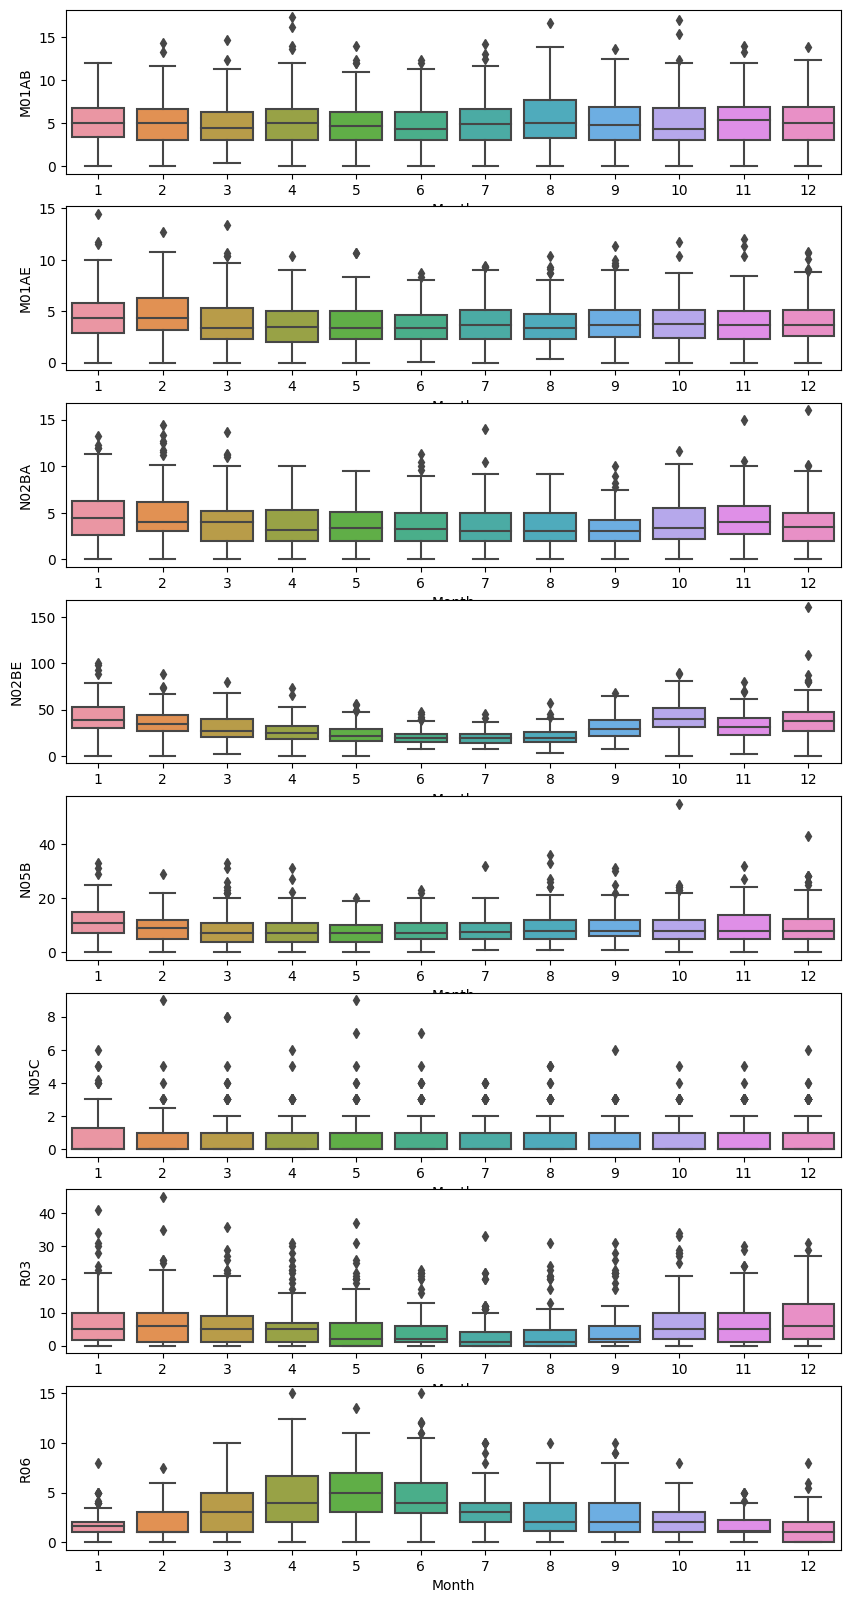

In [42]:
fig, axes = plt.subplots(8, 1, figsize=(10, 20))
for name, ax in zip(['M01AB','M01AE','N02BA','N02BE', 'N05B','N05C','R03','R06'], axes):
    sns.boxplot(data=df_daily, x="Month", y=name, ax=ax)

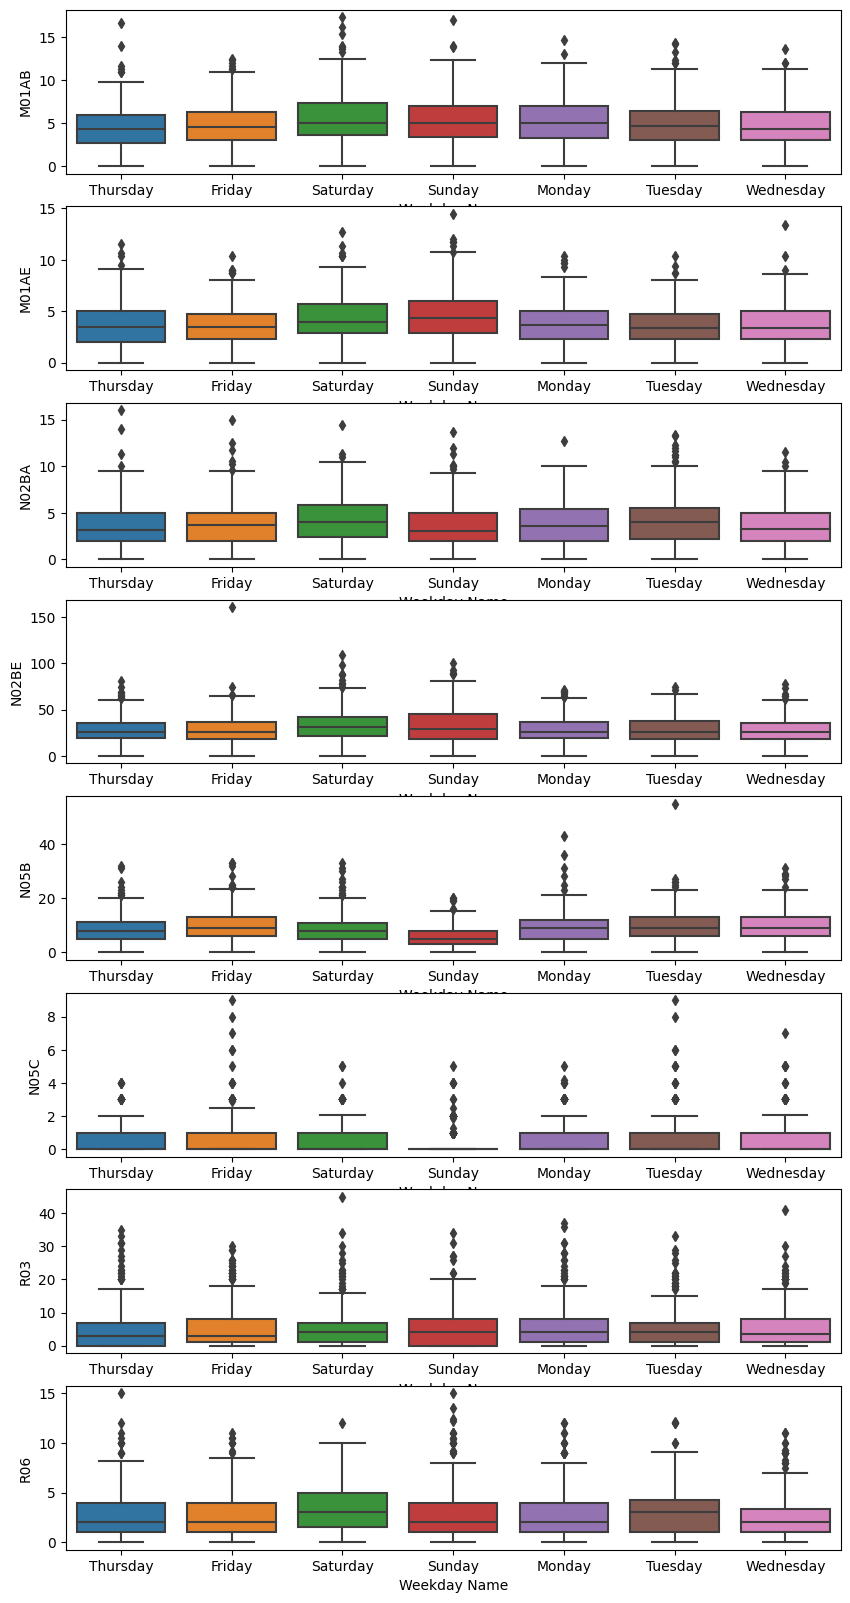

In [43]:
fig, axes = plt.subplots(8, 1, figsize=(10, 20))
for name, ax in zip(['M01AB','M01AE','N02BA','N02BE', 'N05B','N05C','R03','R06'], axes):
    sns.boxplot(data=df_daily, x="Weekday Name", y=name, ax=ax)

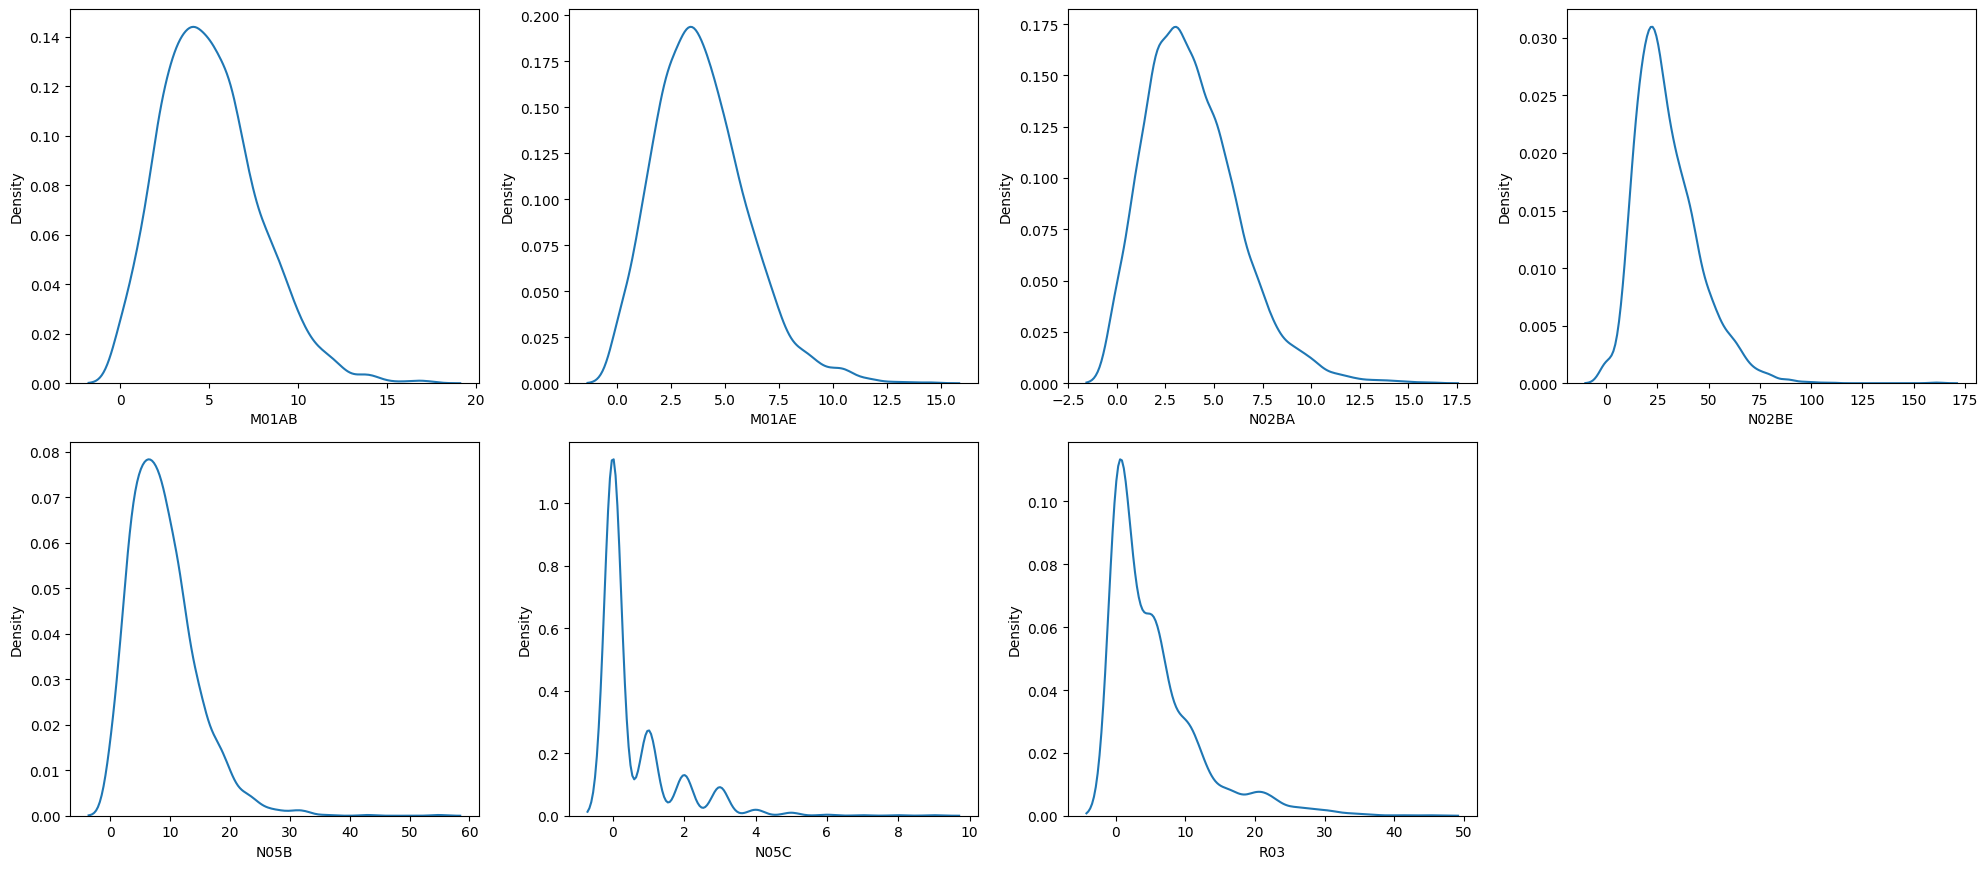

In [ ]:
plt.figure(figsize = (20, 30))
plotnumber = 1

for drug in drugs:
    if plotnumber <= (len(drugs)-1):
        ax = plt.subplot(7, 4, plotnumber)
        sns.kdeplot(df_daily[drug]) 
        
    plotnumber += 1

plt.tight_layout()
plt.show()

### Correlation Analysis - ACF & PACF Plot

In [44]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

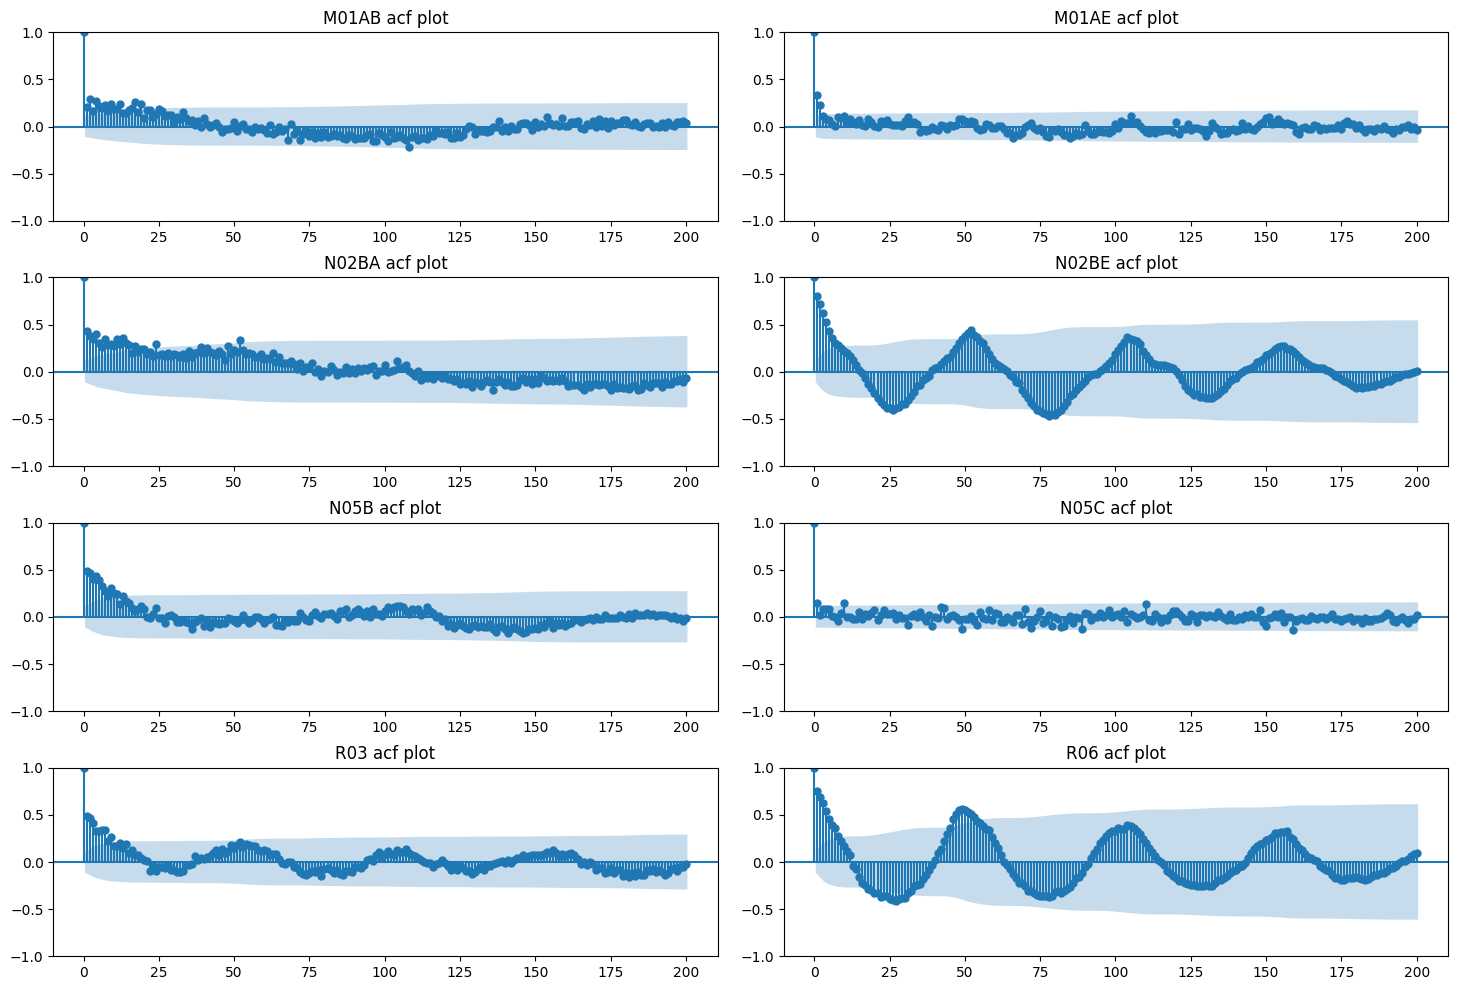

In [45]:
subplotindex=0
numrows=4
numcols=2
fig, ax = plt.subplots(numrows, numcols, figsize=(18,12))
plt.subplots_adjust(wspace=0.1, hspace=0.3)
with plt.rc_context():
    plt.rc("figure", figsize=(18,12))
    for drug in ['M01AB','M01AE','N02BA','N02BE', 'N05B','N05C','R03','R06']:
        rowindex=math.floor(subplotindex/numcols)
        colindex=subplotindex-(rowindex*numcols)
        plot_acf(df_weekly[drug], lags=200, title=drug + ' acf plot', ax=ax[rowindex,colindex])
        subplotindex=subplotindex+1

##### There is mild autocorrelation in almost all drug series except N05C. And N02BE, R03 and R06 series were found to exhibit annual seasonality as the same pattern is repeated after 52 weeks.

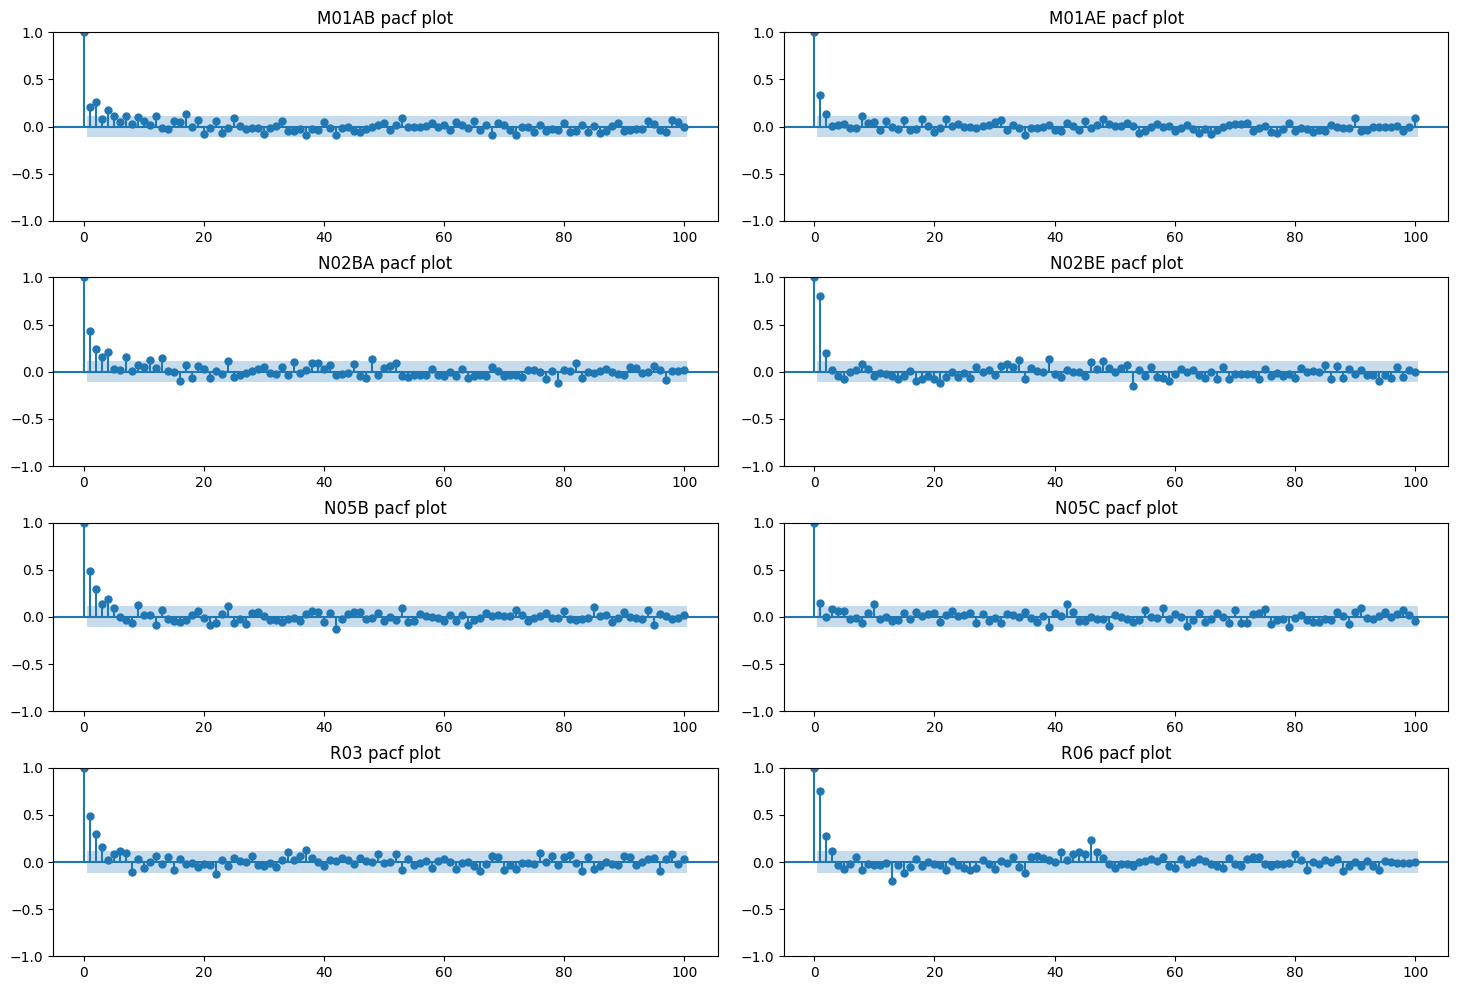

In [78]:
subplotindex=0
numrows=4
numcols=2
fig, ax = plt.subplots(numrows, numcols, figsize=(18,12))
plt.subplots_adjust(wspace=0.1, hspace=0.3)
with plt.rc_context():
    plt.rc("figure", figsize=(18,12))
    for drug in ['M01AB','M01AE','N02BA','N02BE', 'N05B','N05C','R03','R06']:
        rowindex=math.floor(subplotindex/numcols)
        colindex=subplotindex-(rowindex*numcols)
        plot_pacf(df_weekly[drug], lags=100, title=drug + ' pacf plot', ax=ax[rowindex,colindex])
        subplotindex=subplotindex+1

In [79]:
def lagplot(x, y=None, lag=1, standardize=False, ax=None, **kwargs):
    from matplotlib.offsetbox import AnchoredText
    x_ = x.shift(lag)
    if standardize:
        x_ = (x_ - x_.mean()) / x_.std()
    if y is not None:
        y_ = (y - y.mean()) / y.std() if standardize else y
    else:
        y_ = x
    corr = y_.corr(x_)
    if ax is None:
        fig, ax = plt.subplots()
    scatter_kws = dict(
        alpha=0.75,
        s=3,
    )
    line_kws = dict(color='C3', )
    ax = sns.regplot(x=x_,
                     y=y_,
                     scatter_kws=scatter_kws,
                     line_kws=line_kws,
                     lowess=True,
                     ax=ax,
                     **kwargs)
    at = AnchoredText(
        f"{corr:.2f}",
        prop=dict(size="large"),
        frameon=True,
        loc="upper left",
    )
    at.patch.set_boxstyle("square, pad=0.0")
    ax.add_artist(at)
    ax.set(title=f"Lag {lag}", xlabel=x_.name, ylabel=y_.name)
    return ax

def plot_lags(x, y=None, lags=6, nrows=1, lagplot_kwargs={}, **kwargs):
    import math
    kwargs.setdefault('nrows', nrows)
    kwargs.setdefault('ncols', math.ceil(lags / nrows))
    kwargs.setdefault('figsize', (kwargs['ncols'] * 2, nrows * 2 + 0.5))
    fig, axs = plt.subplots(sharex=True, sharey=True, squeeze=False, **kwargs)
    for ax, k in zip(fig.get_axes(), range(kwargs['nrows'] * kwargs['ncols'])):
        if k + 1 <= lags:
            ax = lagplot(x, y, lag=k + 1, ax=ax, **lagplot_kwargs)
            ax.set_title(f"Lag {k + 1}", fontdict=dict(fontsize=14))
            ax.set(xlabel="", ylabel="")
        else:
            ax.axis('off')
    plt.setp(axs[-1, :], xlabel=x.name)
    plt.setp(axs[:, 0], ylabel=y.name if y is not None else x.name)
    fig.tight_layout(w_pad=0.1, h_pad=0.1)
    return fig


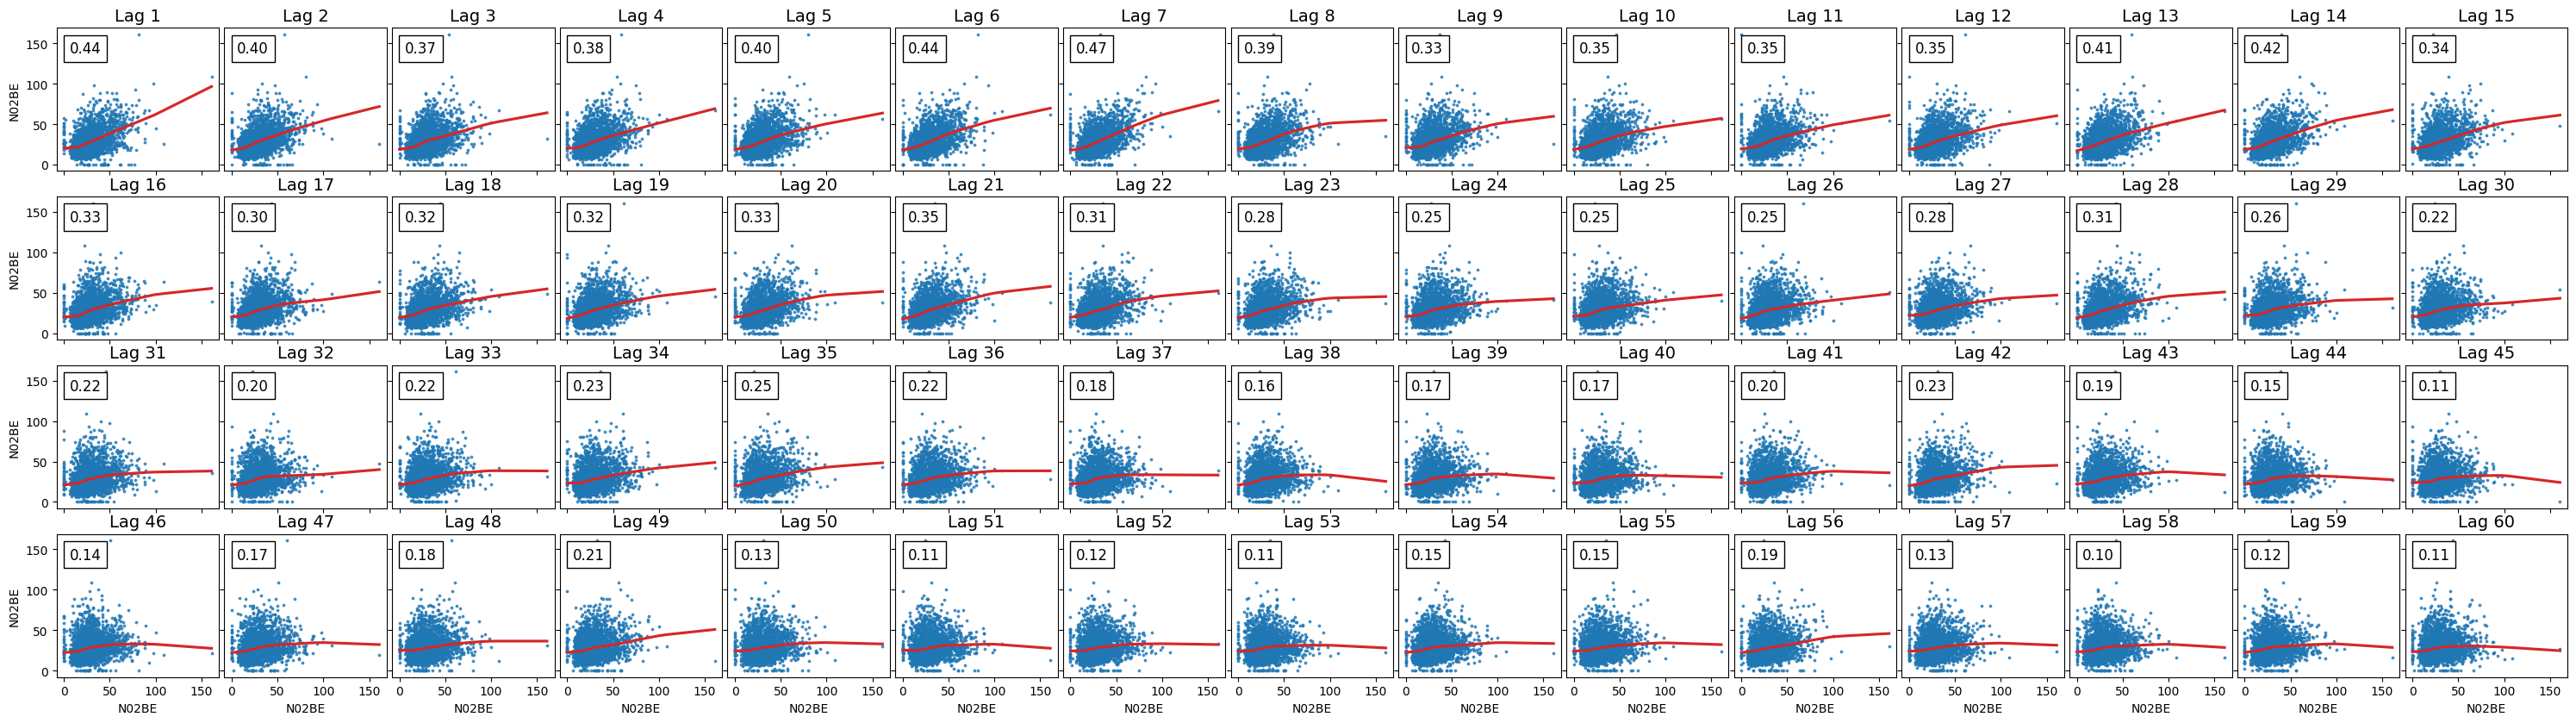

In [80]:
_ = plot_lags(df_daily['N02BE'], lags=60, nrows=4)

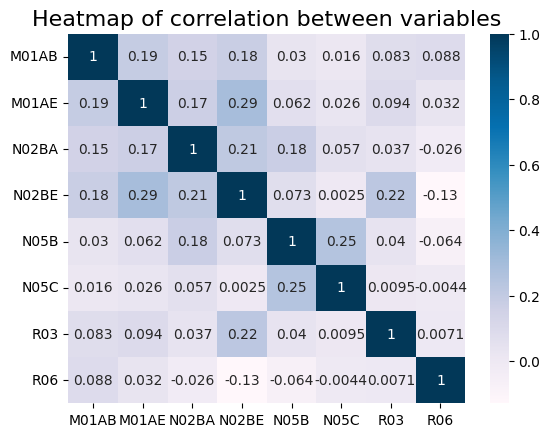

In [51]:
ax = sns.heatmap(df_daily[['M01AB', 'M01AE', 'N02BA', 'N02BE', 'N05B', 'N05C', 'R03', 'R06']].corr(), annot=True, cmap='PuBu')
plt.title('Heatmap of correlation between variables', fontsize=16)
plt.show()